## Monthly Milk Production Forecasting 
Using RNN, LSTM, and GRU Deep Learning Models


##### Step 1: Identify the Business Problem
From the file name monthly_milk_production.csv, it is clear that this dataset showing the monthly milk production of a dairy farm or industry.
Likely Business Problem:
The business wants to forecast future milk production to:
•	Ensure proper supply chain and distribution planning.
•	Manage inventory and storage efficiently.
•	Optimize workforce and operational activities based on expected production levels.
•	Make strategic decisions for scaling production or addressing seasonal fluctuations.
________________________________________
##### Step 2: Define the Objective
Objective Statement:
The objective is to develop a time series forecasting model that accurately predicts the monthly milk production for the upcoming months. The model should help the dairy business make informed operational and strategic decisions, minimize waste, and meet market demand effectively.

Steps to include; <br>
✅ Assignment Tasks <br>
1.	Exploratory Data Analysis (EDA)
   - Visualize trends, seasonality, and anomalies in the milk production data.
   - Check for any missing values or outliers.
   - Normalize or scale the data for neural network models.
2.	Data Preparation for Deep Learning
   - Create input-output sequences (time windows) suitable for training         RNNs/LSTMs/GRUs.
   - Split data into training, validation, and test sets.
   - Reshape data for model input dimensions.
3.	Model Building
   - Build three separate models:
      1. Basic RNN
      2. LSTM
      3. GRU
   - Tune hyperparameters (e.g., window size, number of units, batch size, epochs).
   - Use appropriate loss functions and optimizers.
4.	Model Evaluation
   - Plot predictions vs. actual values.
   - Calculate forecasting metrics: RMSE, MAE, MAPE.
   - Compare the performance of RNN, LSTM, and GRU.
5.	Prediction and Visualization
   - Forecast milk production for the next 12 months.
   - Visualize the predicted trend with uncertainty or confidence intervals if possible.
6.	Business Insights
   - Interpret results and recommend how the dairy business can use these forecasts for better planning and resource allocation.



### Import the Libraries

In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

### Load Dataset

In [6]:
df=pd.read_csv("C:\\Users\\bilad\\ExcelR\\Assignments\\Datasets\\monthly_milk_production.csv")
df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


### EDA And Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [9]:
df.isnull().sum()

Date          0
Production    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [12]:
# Convert 'Date' column to datetime, specifying the correct format
df['Date']=pd.to_datetime(df['Date'], errors='coerce')

# Set Date as index for easier plotting
df.set_index('Date', inplace=True)
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


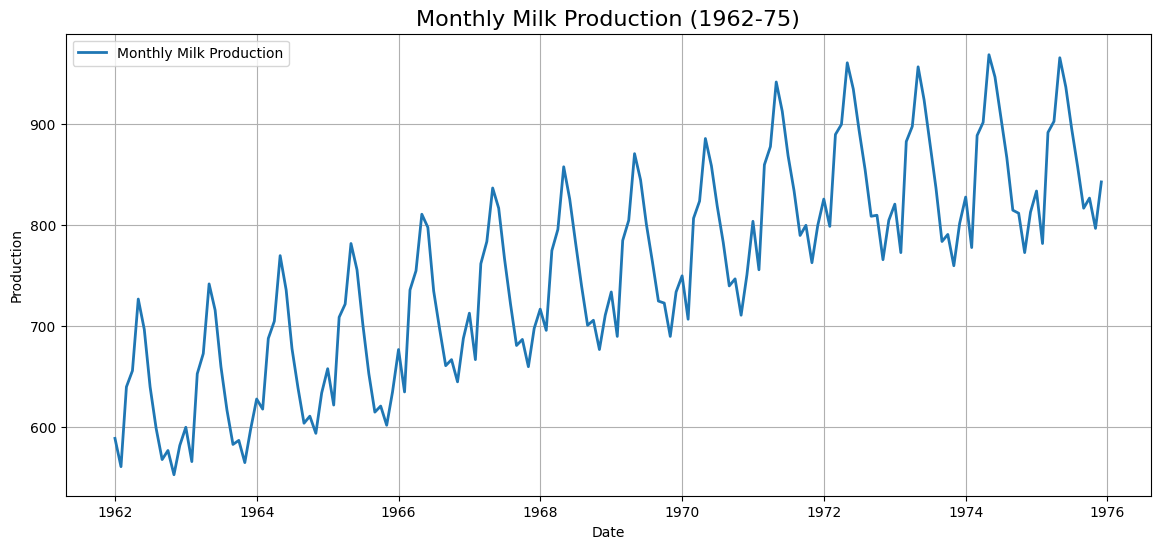

In [13]:
#plot the monthly Milk production
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(df['Production'], label='Monthly Milk Production', linewidth=2)
plt.title('Monthly Milk Production (1962-75)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

- A consistent upward trend and strong seasonality.
- The data is considered as non-stationary due to presence of both trend and seasonality

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#Use 'Production ' for forecasting
production_data=df[['Production']].values

#Normalize the data
scaler=MinMaxScaler(feature_range=(0,1))
production_scaled=scaler.fit_transform(production_data)


#prepare sequences (last 30 months --> predict next month)

x=[]
y=[]
n_steps=30

for i in range(n_steps, len(production_scaled)):
    x.append(production_scaled[i-n_steps:i, 0])  #30 time steps
    y.append(production_scaled[i, 0]) #1 step ahead

x, y=np.array(x), np.array(y)

x.shape, y.shape


((138, 30), (138,))

In [16]:
# Train Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, shuffle=False)

Text(0.5, 0, 'Yearly Average Milk Production')

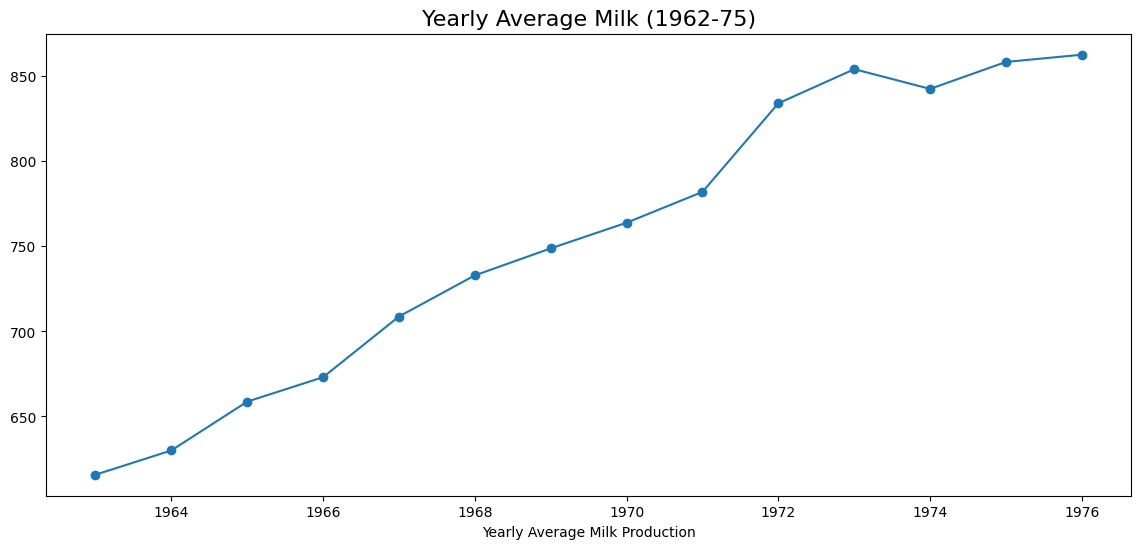

In [17]:
#Resample to montly frequency and calculate teh mean
yearly_avg= df['Production'].resample('Y').mean()

#plot
plt.figure(figsize=(14, 6))
plt.plot(yearly_avg, marker='o', linestyle='-')
plt.title('Yearly Average Milk (1962-75)', fontsize=16)
plt.xlabel('Yearly Average Milk Production')

### Model Building

In [19]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import SimpleRNN, Dense

#Build RNN model
model=Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(x.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [20]:
history_rnn=model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 428ms/step - loss: 0.0366 - val_loss: 0.0499
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0200 - val_loss: 0.0321
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0135 - val_loss: 0.0113
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0128 - val_loss: 0.0423
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0115 - val_loss: 0.0380
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0067 - val_loss: 0.0157
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0071 - val_loss: 0.0174
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0049 - val_loss: 0.0196
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0037 - val_loss: 0.0083
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0033 - val_loss: 0.0055
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0030 - val_loss: 0.0074
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0027 - val_loss: 0.

In [21]:
# LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM model
model_lstm=Sequential([
    LSTM(64, return_sequences=False, input_shape=(x.shape[1], 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
history_lstm=model_lstm.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - loss: 0.1903 - val_loss: 0.2769
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0986 - val_loss: 0.0928
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0383 - val_loss: 0.0226
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0316 - val_loss: 0.0446
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0425 - val_loss: 0.0225
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0281 - val_loss: 0.0315
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0275 - val_loss: 0.0420
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0308 - val_loss: 0.0434
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0271 - val_loss: 0.0355
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0260 - val_loss: 0.0263
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0252 - val_loss: 0.0221
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0272 - val_lo

In [23]:
# Gated Recurrent Unit Model
from tensorflow.keras.layers import GRU, Dense, Dropout

model_gru =Sequential([
    GRU(64, return_sequences=False, input_shape=(x.shape[1], 1)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mse')
model_gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,977 (58.50 KB)

 Trainable params: 14,977 (58.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history_gru=model_gru.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - loss: 0.2631 - val_loss: 0.4978
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - loss: 0.1938 - val_loss: 0.3745
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1352 - val_loss: 0.2749
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0959 - val_loss: 0.1760
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0560 - val_loss: 0.0916
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - loss: 0.0317 - val_loss: 0.0362
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0284 - val_loss: 0.0191
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0310 - val_loss: 0.0201
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0373 - val_loss: 0.0184
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0299 - val_loss: 0.0218
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0251 - val_loss: 0.0331
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.0234 - val_los

In [25]:
#prediction of all 3 models 
pred_rnn=model.predict(x_train)
pred_lstm=model_lstm.predict(x_train)
pred_gru=model_gru.predict(x_train)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000027130B565F0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step


### Model Evaluation

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/ y_true)) * 100

#RNN scores
rmse_rnn= np.sqrt(mean_squared_error(y_train, pred_rnn))
mae_rnn=mean_absolute_error(y_train, pred_rnn)
mape_rnn=mape(y_train, pred_rnn)

# LSTM Scores
rmse_lstm=np.sqrt(mean_squared_error(y_train, pred_lstm))
mae_lstm=mean_absolute_error(y_train, pred_lstm)
mape_lstm=mape(y_train, pred_gru)

#GRU scores
rmse_gru=np.sqrt(mean_squared_error(y_train, pred_gru))
mae_gru=mean_absolute_error(y_train, pred_gru)
mape_gru=mape(y_train, pred_gru)

print('Model Performance Metrics:')
print(f'RNN => RMSE: {rmse_rnn:.3f}, MAE:{mae_rnn:.3f}, MAPE: {mape_rnn:.2f}%')
print(f'LSTM => RMSE:{rmse_lstm:.3f}, MAE:{mae_lstm:.3f}, MAPE: {mae_lstm:.2f}%')
print(f'GRU => RMSE:{rmse_gru:.3f}, MAE:{mae_gru:.3f}, MAPE:{mape_gru:.2f}%')

Model Performance Metrics:
RNN => RMSE: 0.043, MAE:0.033, MAPE: 63.67%
LSTM => RMSE:0.148, MAE:0.127, MAPE: 0.13%
GRU => RMSE:0.140, MAE:0.117, MAPE:55.26%


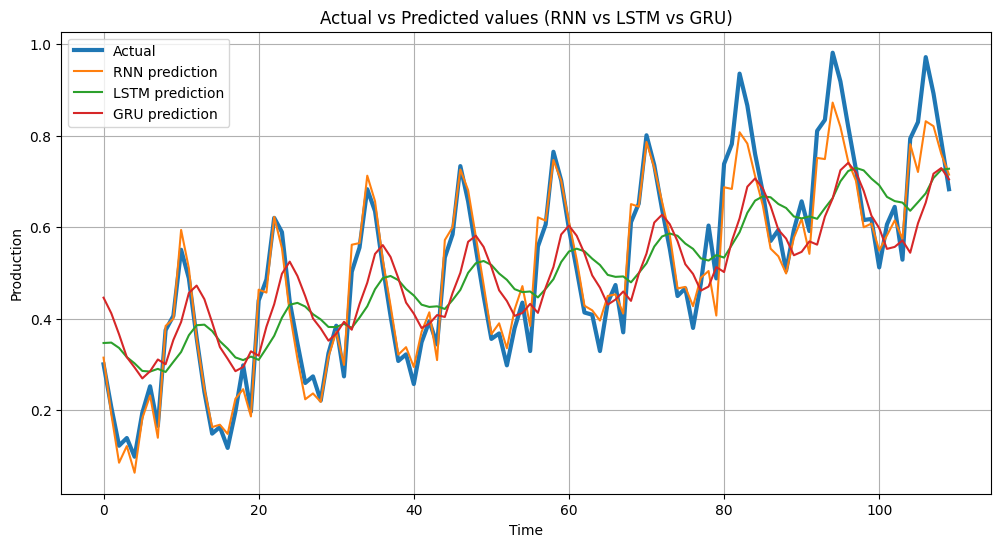

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_train, label='Actual', linewidth=3)
plt.plot(pred_rnn, label='RNN prediction')
plt.plot(pred_lstm, label='LSTM prediction')
plt.plot(pred_gru, label='GRU prediction')
plt.title('Actual vs Predicted values (RNN vs LSTM vs GRU)')
plt.xlabel('Time')
plt.ylabel('Production')
plt.legend()
plt.grid(True)
plt.show()

#### Forecast Next 12 Months(Using LSTM)

In [60]:
import matplotlib.pyplot as plt

last_seq =production_scaled[-30:]
current_input =last_seq.reshape(1, 30, 1)

future_preds = []
lower_bounds = []
upper_bounds = []

# Forecast next 12 months
def mc_prediction(model, x, n=30):
    preds =[]
    for _ in range(n):
        pred = model(x, training=True).numpy()[0][0]
        preds.append(pred)
    return np.array(preds)

for _ in range(12):
    # multiple predictions = distribution
    mc_preds = mc_prediction(model_lstm, current_input, n=50)

    pred_mean= mc_preds.mean()
    pred_std = mc_preds.std()

    future_preds.append(pred_mean)
    lower_bounds.append(pred_mean - 1.96 * pred_std)
    upper_bounds.append(pred_mean + 1.96 * pred_std)

    #update input sequence
    updated =np.append(current_input[:, 1:, :], [[[pred_mean]]], axis=1)
    current_input = updated

# Inverse scaling
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))
lower_real = scaler.inverse_transform(np.array(lower_bounds).reshape(-1, 1))
upper_real = scaler.inverse_transform(np.array(upper_bounds).reshape(-1, 1))


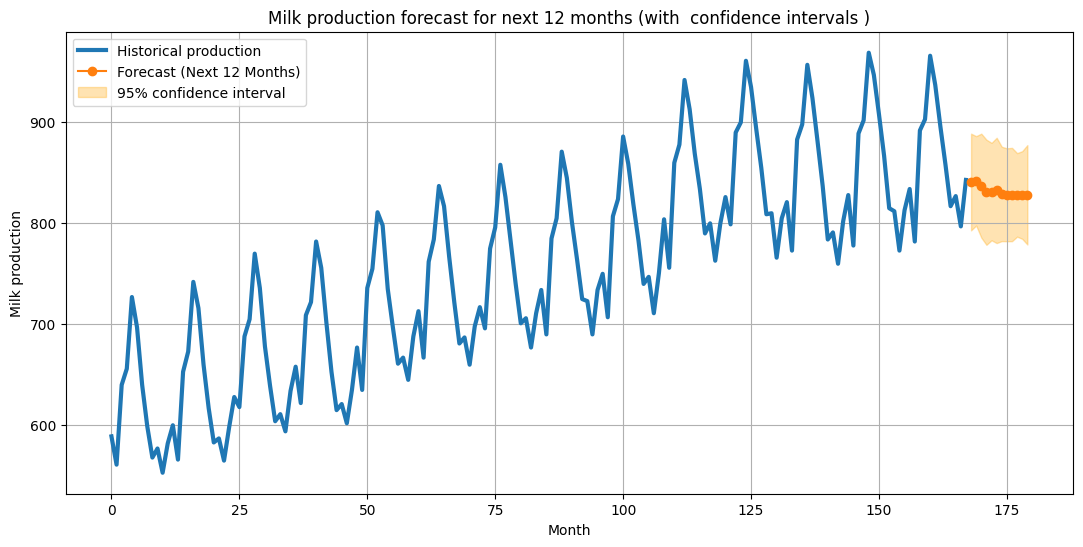

In [64]:
# Visualization with confidence Intervals

actual=df['Production'].values
plt.figure(figsize=(13, 6))

#Actual historical values
plt.plot(actual, label='Historical production', linewidth=3)

#Forecasted values
future_index = range(len(actual), len(actual) + 12)
plt.plot(future_index, future_preds_real, label='Forecast (Next 12 Months)', marker='o')

#confidence interval shading
plt.fill_between(
    future_index,
    lower_real.flatten(),
    upper_real.flatten(),
    color='orange',
    alpha=0.3,
    label='95% confidence interval'
)

plt.title('Milk production forecast for next 12 months (with  confidence intervals )')
plt.xlabel('Month')
plt.ylabel('Milk production')
plt.legend()
plt.grid(True)
plt.show()

### Business Insights from the 12-Month Milk Production Forecast

- The forecast shows stable milk production over the next 12 months with no major fluctuations.
- The narrow confidence interval indicates low uncertainty and high reliability of predictions.
- Seasonal patterns continue but remain predictable and controlled.
- The dairy can plan feed procurement, storage, and workforce efficiently without risk of shortages.
- Stable forecasts support better inventory management, cost control, and long-term contract planning.